# Performing FFT on arbitrary function
The purpose of this notebook is to show generate and plot an arbitrary function defined over a certain domain with a certain period, perform and perform the Discrete Fourier Transform using the FFT algorithm. 
The function $cosh(\alpha t)$ will be used as an example. The Fourier coefficients are analytically found using the function definition in Cell [6].
The analytical and FFT solutions are then plotted together


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift



def V(f,t,alpha,domain, period):
    '''
     Function V that transforms input non periodic function f with argument alpha * t into a periodic function defined in a certain domain
  
     Parameters:
      -----------

    f : input function

    t : array type input
   
    alpha : scaling argument in the function

    domain: array dtype input defining interval of the function 

    period: peiod of f

   '''

    V = np.zeros_like(t)  #Create an array of the same length as t
    counter = 0
    # We assign value V(t) depending on the value of t
    
    for i in t:
        if i > domain[0] and i < domain[1]:   # V(t) 
            V[counter] = f(alpha *i)
        while i > domain[1]:                 # V(t+2pi) = V(t)
            i = i - period
            if i < domain[1]:
                V[counter] = f(alpha* i)
                break
        while i < domain[0]:                # V(t - 2pi) = V(t)
            i = i + period
            if i > domain[0]:
                V[counter] = f(alpha* i)
                break
        counter += 1


    return V

In [2]:
# Defining function features

f = np.cosh
alpha = 2
domain = [-np.pi, np.pi]
period = 2*np.pi
dt = 0.01                                       
t_initial = - 4*np.pi                            
t_final = 4* np.pi
interval = t_final - t_initial
t = np.arange(t_initial, t_final, dt*np.pi)

  

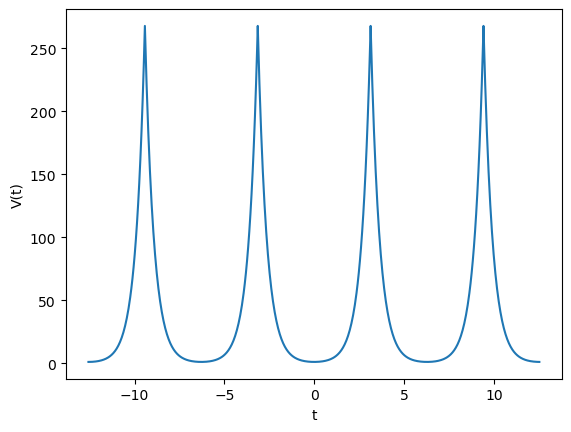

In [3]:
# Transforming f into V,
V = V(f, t, alpha, domain,period)  
  
# Plotting 
plt.plot(t, V)
plt.xlabel("t")
plt.ylabel("V(t)");


We can perform a DFT on V using fft algorithm

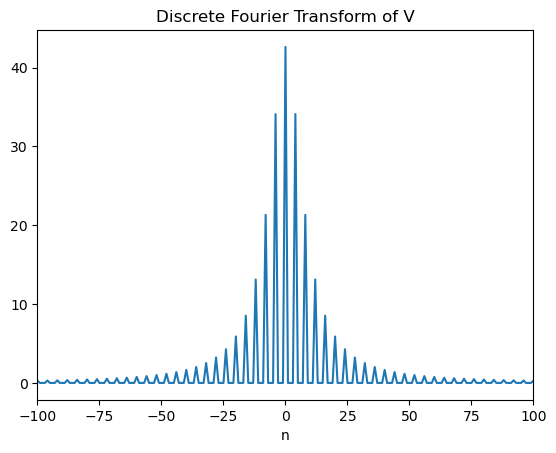

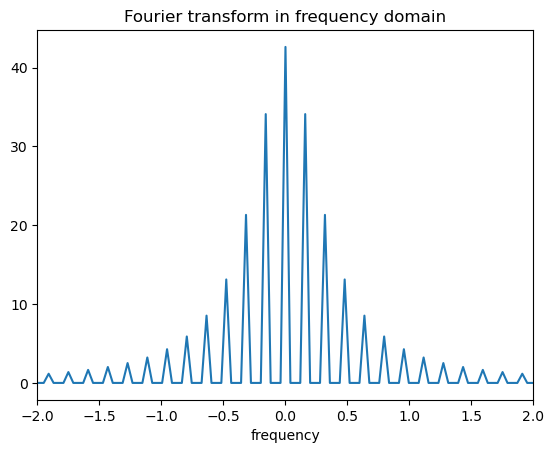

In [4]:
N = abs(interval)/(dt*np.pi)
V_fft = fft(V, norm ='forward')    #Fast Fourier transform of function V(t)
n = np.arange(-N/2,N/2,1)
Vfft_magnitudes = np.sqrt(np.real(fftshift(V_fft)*np.conjugate(fftshift(V_fft)))) # Tranforms DFT row data into magnitudes

plt.plot(n, Vfft_magnitudes); #Plot DFT shifting to center the zero frequency
plt.title("Discrete Fourier Transform of V")
plt.xlabel("n")
plt.xlim(-100,100)
plt.show()
freq = n / interval               # obtain frequencies

plt.plot(freq, Vfft_magnitudes)  # Plot DFT in the frequency domain
plt.title("Fourier transform in frequency domain")
plt.xlabel("frequency")
plt.xlim(-2,2);                # Plot of the DFT against frequency in [-2,2]

### Comparison with analytical Fourier transform

In [5]:
def analytical_V(n):
    return (1/np.pi)* (4 * np.sinh(2*np.pi)* (-1)**n)/(4 + n**2)

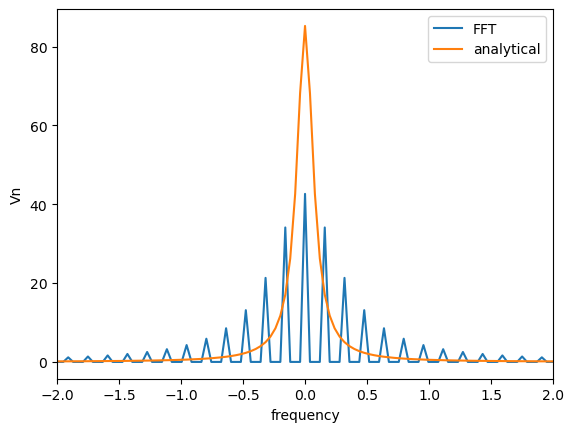

In [6]:
analytical = np.zeros_like(n)
for i in n:
    analytical[int(i)] = analytical_V(int(i))

analytical_magnitudes = np.sqrt(fftshift(analytical)**2)
plt.plot(freq, Vfft_magnitudes, label = "FFT")
plt.plot(freq, analytical_magnitudes, label= "analytical")
plt.xlim(-2,2)
plt.xlabel("frequency")
plt.ylabel("Vn")
plt.legend();